#  Goldman Sachs S&P 500 ETF Python and Monte Carlo Simulation Forecast Project


# Project Created by Julian Cabrera

# Project Assigned by Jay Rao, VP and Quant researcher at Goldman Sachs 

In [63]:
# Imports necessary libraries 

import numpy as np 
import pandas as pd 
from pylab import mpl, plt 

In [64]:
# imports csv library 

import csv 

In [65]:
# imports S&P 500 data from 2000-2024 using csv library 

df= pd.read_csv('bro.csv')

In [66]:
# removes uncessary columns other than 'Close' Column'

clipped = df.drop(['Open','High','Low','Adj Close Adjusted close price adjusted for splits and dividend and/or capital gain distributions.','Volume'], axis=1)

In [67]:
# prints updated dataframe named "clipped" 

print(clipped)



              Date Close Close price adjusted for splits.
0     Jul 12, 2024                               5,615.35
1     Jul 11, 2024                               5,584.54
2     Jul 10, 2024                               5,633.91
3      Jul 9, 2024                               5,576.98
4      Jul 8, 2024                               5,572.85
...            ...                                    ...
6165   Jan 7, 2000                               1,441.47
6166   Jan 6, 2000                               1,403.45
6167   Jan 5, 2000                               1,402.11
6168   Jan 4, 2000                               1,399.42
6169   Jan 3, 2000                               1,455.22

[6170 rows x 2 columns]


In [68]:
# Fixes string input error for 'Close' Column 

clipped = clipped.rename(columns={'Close Close price adjusted for splits.':'Close'})

In [69]:
#prints updated "Clipped Dataframe" that has only contains a column with closing prices 

clipped['Close']

0       5,615.35
1       5,584.54
2       5,633.91
3       5,576.98
4       5,572.85
          ...   
6165    1,441.47
6166    1,403.45
6167    1,402.11
6168    1,399.42
6169    1,455.22
Name: Close, Length: 6170, dtype: object

In [70]:
# convert Date Column to Date Time, (shows Traceback and error because 'Date' Column is now index)

clipped['Date'] = pd.to_datetime(clipped['Date'])

In [71]:
# Sets the Index as the 'Date' Column for a Date Time Index 

clipped.set_index('Date', inplace=True)

In [72]:
# prints updated Column dataframe that has Date indexed Closing Prices 

print(clipped)


               Close
Date                
2024-07-12  5,615.35
2024-07-11  5,584.54
2024-07-10  5,633.91
2024-07-09  5,576.98
2024-07-08  5,572.85
...              ...
2000-01-07  1,441.47
2000-01-06  1,403.45
2000-01-05  1,402.11
2000-01-04  1,399.42
2000-01-03  1,455.22

[6170 rows x 1 columns]


In [73]:
# removes commas from string data 

clipped = clipped.replace(",",'', regex=True)

In [74]:
# changes Close Column to Float so it can be visualized as numerical data

clipped['Close'] = clipped['Close' ].astype(float)

In [75]:
# Creates Columns for Daily Returns described as percent change from previous days close which will later be adjusted accordingly or percentage formatting 

clipped['Daily Returns as %'] = clipped['Close' ].astype(float).pct_change(-1) 

In [76]:
# Prints top of Data frame, now with the Daily Returns/Changes as % 

clipped.head()

,Close,Daily Returns as %
Date,,
2024-07-12,5615.35,0.005517
2024-07-11,5584.54,-0.008763
2024-07-10,5633.91,0.010208
2024-07-09,5576.98,0.000741
2024-07-08,5572.85,0.001017


In [77]:
#Rounds large decimal float and turns into a percentage using function

decimals = 4 
clipped['Daily Returns as %'] = clipped['Daily Returns as %'].apply(lambda x: round(x,decimals))
clipped['Daily Returns as %'] = clipped['Daily Returns as %'] * 100

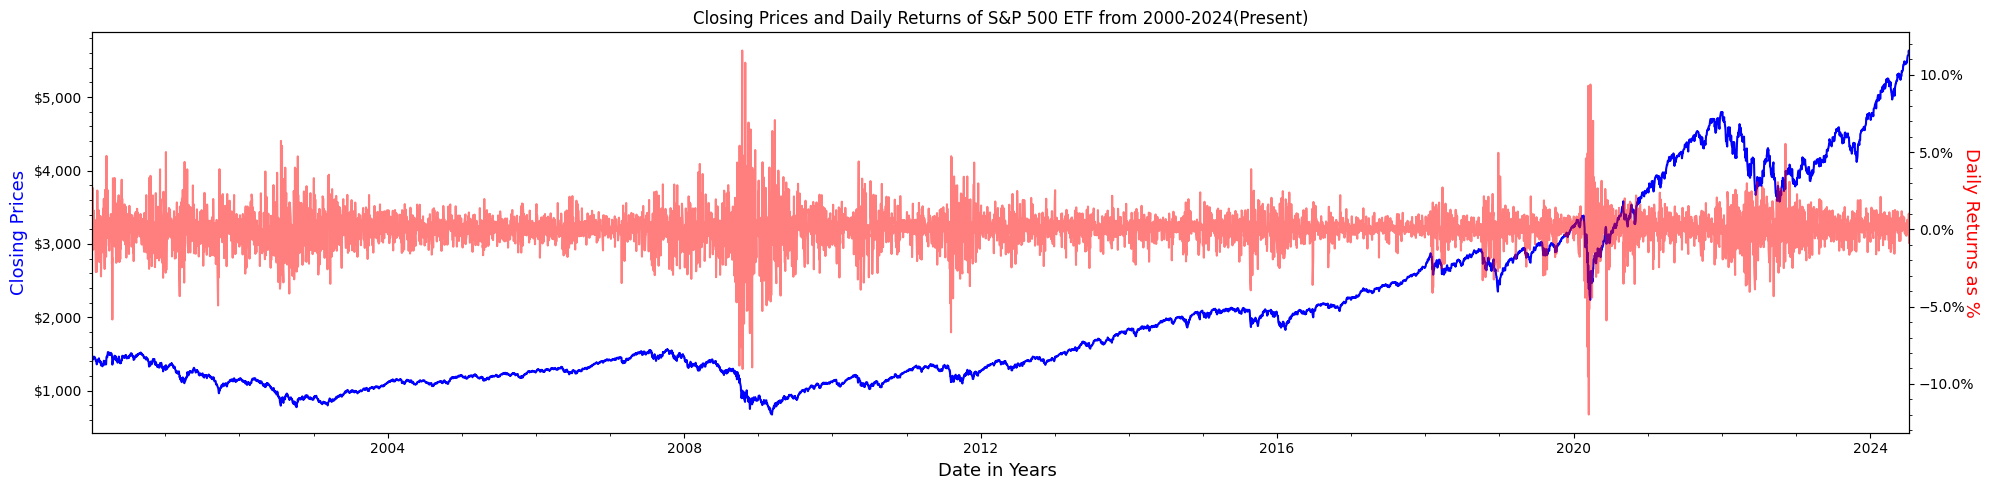

In [78]:
# Plots a Double Line graph representing Daily Returns and S&P 500 ETF Price in last 24 years

import matplotlib.pyplot as plt 
import matplotlib.dates 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,FormatStrFormatter)
import matplotlib.ticker as mtick
from pylab import rcParams


# sets subplots and figure size 

fig, ax1 = plt.subplots()

fig.set_figheight(5)
fig.set_figwidth(20)

plt.title("Closing Prices and Daily Returns of S&P 500 ETF from 2000-2024(Present)")

# sets x-Axis and formats

Years = clipped.index

ax1.xaxis.set_minor_locator(AutoMinorLocator())

ax1.set_xlabel('Date in Years ', fontsize = 13 )

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 


# sets Y values

Closing = clipped['Close']

Returns = clipped['Daily Returns as %']

ax1.xaxis.set_minor_locator(AutoMinorLocator())

#plots subplots and formats

ax2 = ax1.twinx()

ax1.plot(Years, Closing , color = 'b')

ax1.set_ylabel('Closing Prices', color = 'b',fontsize = 13)

ax1.yaxis.set_minor_locator(AutoMinorLocator())


ax2.plot(Years, Returns, color = 'r', alpha = .5)

ax2.set_ylabel('Daily Returns as %', color = 'r', rotation = 270,fontsize = 13)

ax2.yaxis.set_minor_locator(AutoMinorLocator())



ax2.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.margins(x=0)

# shows plot
plt.tight_layout()
plt.show()

Initial Price: 1455.22
Final Price: 5615.35
Percent change from beginning to end: 285.88%


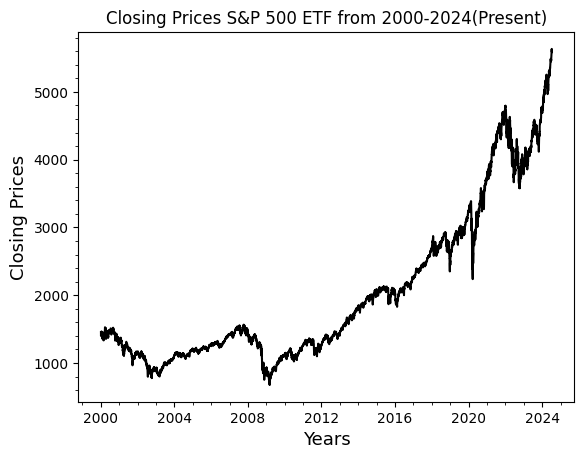

In [79]:

#plot Historical Closing Prices from 2000-2024 in a line plot 

plt.plot(Years,Closing, color = 'black')

plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.ylabel('Closing Prices',fontsize = 13)

plt.xlabel('Years',fontsize = 13)

plt.title("Closing Prices S&P 500 ETF from 2000-2024(Present)")

initial_price = Closing.iloc[-1]
final_price = Closing.iloc[0]
percent_change = ((final_price - initial_price) / initial_price) * 100

print(f"Initial Price: {initial_price:.2f}")
print(f"Final Price: {final_price:.2f}")
print(f"Percent change from beginning to end: {percent_change:.2f}%")

plt.show()

In [80]:
#creates a Column showing the rolling 30-day Mean of Daily Returns 

clipped['30 day Mean of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).mean()

In [81]:
#creates a Column showing the rolling 30-day Standard Deviation of Daily Returns 


clipped['30 day Std of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).std()

In [82]:
#creates a Column showing the rolling 30-day Median of Daily Returns 

clipped['30 day Median of Daily Returns %'] = clipped['Daily Returns as %'].rolling(30).median()

In [83]:
#creates a Column showing the rolling 30-day Correlation of Daily Returns 

clipped['Correlation of Daily Returns']= clipped['Daily Returns as %'].rolling(30).corr 


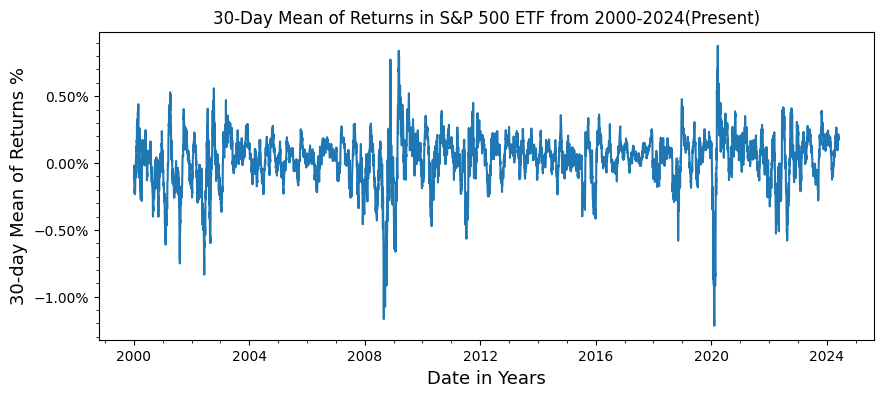

In [84]:

# creates Line Plot of Rolling 30 Day Mean using Seaborn Library

plt.figure(figsize=(10,4))

ax = plt.gca()

y1 = clipped['30 day Mean of Daily Returns %']

plt.plot( clipped.index, y1 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Mean of Returns %', fontsize = 13)


plt.title('30-Day Mean of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

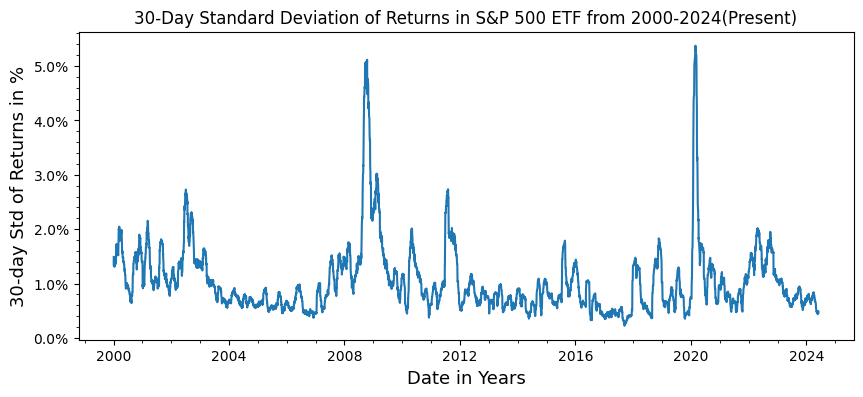

In [39]:

# creates Line Plot of Rolling 30 Day Standard Deviation using Seaborn Library


plt.figure(figsize=(10,4))

ax = plt.gca()

y2 = clipped['30 day Std of Daily Returns %']

plt.plot( clipped.index, y2 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Std of Returns in %', fontsize = 13)


plt.title('30-Day Standard Deviation of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

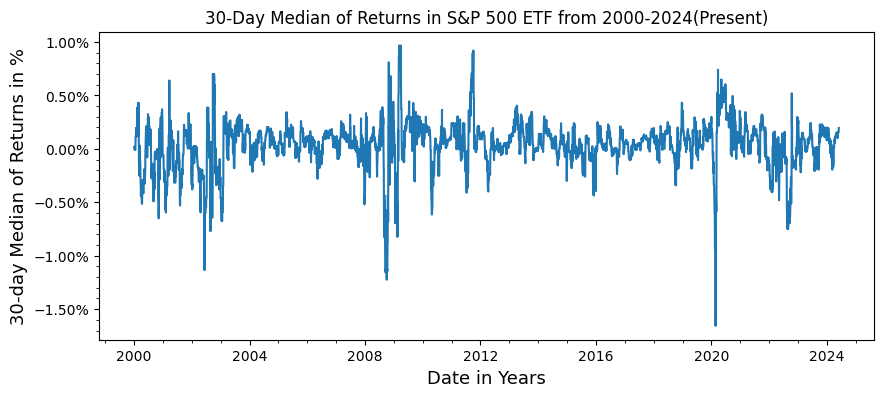

In [41]:


# creates Line Plot of Rolling 30 Day Median using Seaborn Library



plt.figure(figsize=(10,4))



ax = plt.gca()

y4 = clipped['Correlation of Daily Returns']

plt.plot( clipped.index, y3 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 13)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('30-day Median of Returns in %', fontsize = 13)


plt.title('30-Day Median of Returns in S&P 500 ETF from 2000-2024(Present)')

plt.margins(x=.05)


plt.show()

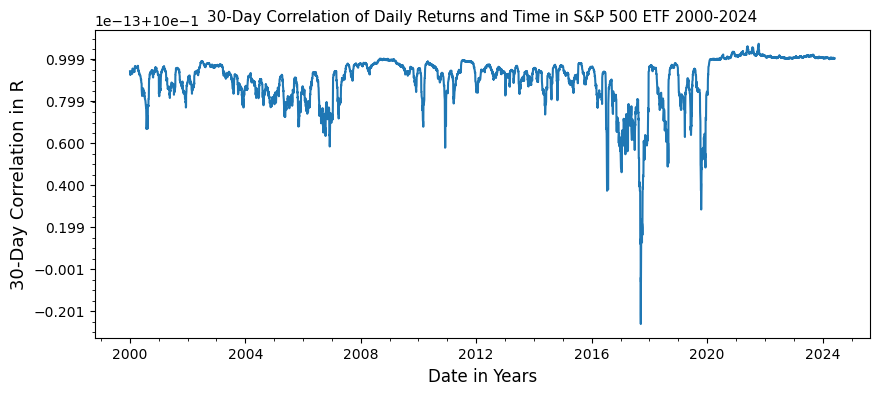

In [42]:

# creates Line Plot of Rolling 30 Day Correlation using Seaborn Library




plt.figure(figsize=(10,4))

ax = plt.gca()

y5 = clipped['Correlation of Daily Returns']

plt.plot( clipped.index, y5 )


ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.set_xlabel('Date in Years', fontsize = 12)



ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_ylabel('30-Day Correlation in R', fontsize = 13)


plt.title('30-Day Correlation of Daily Returns and Time in S&P 500 ETF 2000-2024', fontsize = 10.9)

plt.margins(x=.05)


plt.show()

In [45]:
%pip install seaborn


Simulation 1: 17.318% change from beginning to end
Simulation 2: 371.644% change from beginning to end
Simulation 3: 126.169% change from beginning to end
Simulation 4: 151.860% change from beginning to end
Simulation 5: 221.782% change from beginning to end

Probabilities of price ranges:
Price range 0.00 - 2807.68: 1.71%
Price range 0.00 - 5615.35: 7.89%
Price range 5615.35 - 15615.35: 29.62%
Price range 15615.35 - 25615.35: 20.35%
Price range 25615.35 - 35615.35: 13.11%
Price range 35615.35 - 45615.35: 7.94%
Price range 45615.35 - 55615.35: 5.74%
Price range 55615.35 - 65615.35: 3.49%
Price range 65615.35 - 75615.35: 2.51%
Price range 75615.35 - 85615.35: 2.11%
Price range 85615.35 - 95615.35: 1.38%
Price range 95615.35 - inf: 5.86%
Price range 0.00 - 32646.00: 67.95%
Price range 7243.21 - 72614.68: 76.97%
Price range 69508.68 - 106311.30: 6.16%
Price range 106311.30 - 143143.95: 2.17%
Price range 143143.95 - 179976.60: 1.09%
Price range 179976.60 - 216809.25: 0.50%
Price range 2168

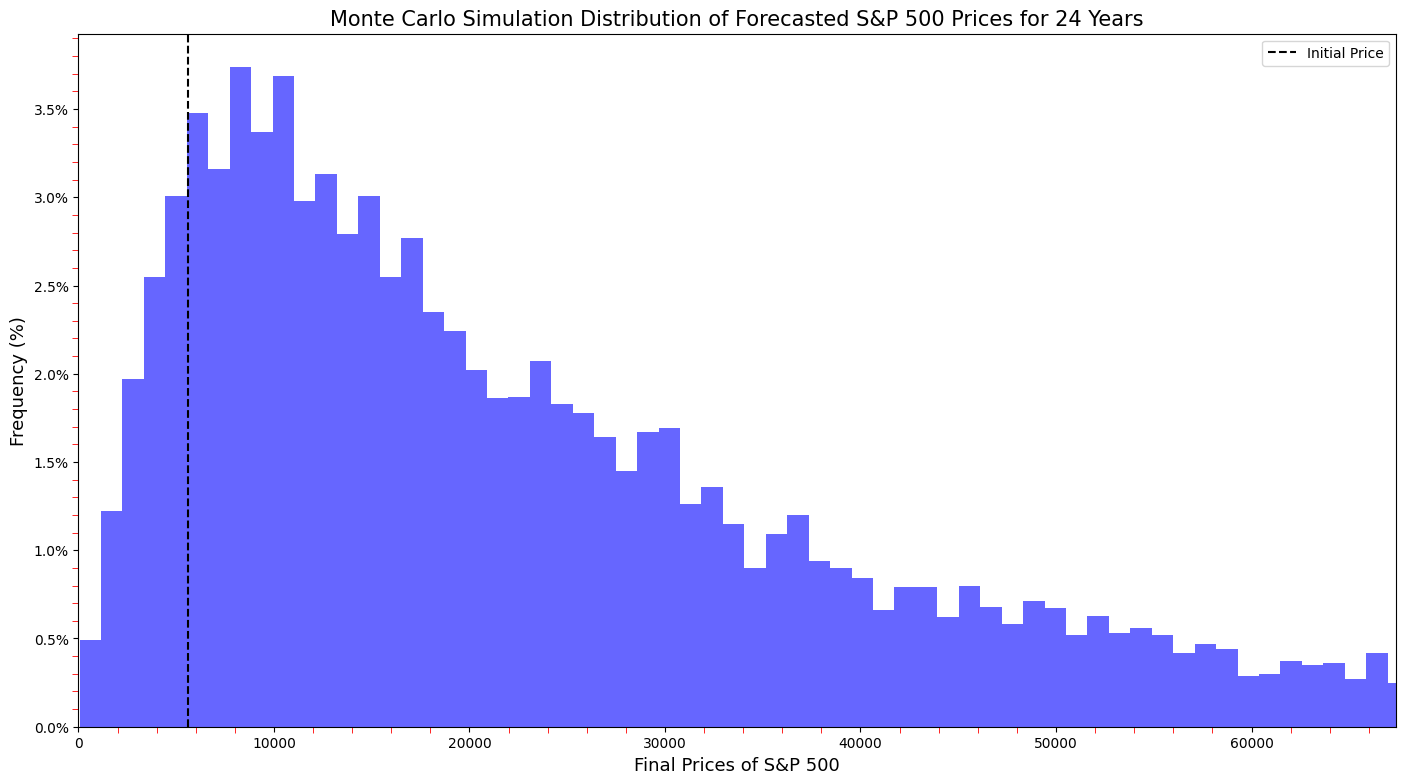

In [62]:
# Creates Logarithimic Distribution of Monte Carlo Simulation Forecast and Returns Probabilities of Price Ranges, Expected Price and Return after 24 Years. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator



# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = clipped['Close'].iloc[0]  # Use the last price as the initial price for simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * np.exp(np.cumsum(sim_returns))
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Plotting the histogram of final prices
plt.figure(figsize=(17, 9))
# Decrease the number of bins to increase bin width
counts, bins, patches = plt.hist(final_prices, bins=750, alpha=0.6, color='b', density=True)

# Convert counts to percentages
bin_width = bins[1] - bins[0]
percentages = counts / counts.sum() * 100

# Plot the histogram with percentage labels
plt.bar(bins[:-1], percentages, width=bin_width, alpha=0.6, color='b')

plt.axvline(initial_price, color='k', linestyle='--', label='Initial Price')

plt.xlabel('Final Prices of S&P 500', fontsize=13)
plt.ylabel('Frequency (%)', fontsize=13)
plt.title('Monte Carlo Simulation Distribution of Forecasted S&P 500 Prices for 24 Years', fontsize=15)
plt.legend()


ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator()) 
ax.tick_params(which='minor', length=4, color='r')

def to_percent(y, position):
    return f'{y:.1f}%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))



# Set x-axis limit if needed
plt.xlim(0, 12 * initial_price)  # Example: setting the limit to twice the initial price



# Calculate and print percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Print the percentage change for a few simulations as examples
for i in range(5):
    print(f"Simulation {i+1}: {percent_changes[i]:.3f}% change from beginning to end")



price_ranges = [ 
    (5000, 6000),
    (4000, 5000),
    (3000, 4000),
    (2000, 3000),
    (1000, 2000),
    (0, 1000),
    (6000, 8000),
    (8000, 10000),
    (10000, 12000),
    (12000, 14000) ]

plt.minorticks_on()
mean = 32646
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

price_ranges = [
    (0, initial_price * 0.5),
    (0, initial_price), # 
    (initial_price, initial_price +10000),
    (initial_price +10000, initial_price +20000),
    (initial_price +20000, initial_price +30000),
    (initial_price +30000, initial_price +40000),
    (initial_price +40000, initial_price +50000),
    (initial_price +50000, initial_price +60000),
    (initial_price +60000, initial_price +70000),
    (initial_price +70000, initial_price +80000),
    (initial_price+80000, initial_price+90000),
    (initial_price + 90000, np.inf),

     (0,mean),
    (7243.21,72614.68),
    (mean + 36862.68 , mean + 36832.65 + 36832.65),
    ( mean + 36832.65 + 36832.65 ,mean + 36832.65 + 36832.65 + 36832.65),
    (mean + 36832.65 + 36832.65 + 36832.65, mean + 36832.65 + 36832.65+ 36832.65 + 36832.65),
    (mean + 36832.65 + 36832.65+ 36832.65 + 36832.65,mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65),
    (mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65,mean + 36832.65 + 36832.65+ 36832.65 + 36832.65+ 36832.65 + 36832.65), 
    (mean , mean + 36862.68) ]

    


# Calculate probabilities for each range
probabilities = []
for lower_bound, upper_bound in price_ranges:
    count_in_range = np.sum((final_prices >= lower_bound) & (final_prices < upper_bound))
    probability = count_in_range / num_simulations
    probabilities.append((lower_bound, upper_bound, probability))
print("\nProbabilities of price ranges:")
for lower_bound, upper_bound, probability in probabilities:
    print(f"Price range {lower_bound:.2f} - {upper_bound:.2f}: {probability:.2%}")


expected_final_price = np.mean(final_prices)
expected_return = ((expected_final_price - initial_price) / initial_price) * 100

print(f"\nExpected final price: {expected_final_price:.2f}")
print(f"Expected return: {expected_return:.2f}%")



    

In [64]:
# Calculating the probabilities for each return range for the 24 year Forecasted Prices 


return_ranges = [
    (-50, -25),
    (-25, 0),
    (0, 75),
    
    (75, 150),
    (150, 225),
    (225,300),
    (300,375),
    (375,450),
    (450,525),
    (525,600),
    (600, 700),(700, 800),(800, 900),(900, 1000)
    
]

# Calculate probabilities for each return range
return_probabilities = []
for lower_bound, upper_bound in return_ranges:
    count_in_range = np.sum((percent_changes >= lower_bound) & (percent_changes < upper_bound))
    probability = count_in_range / num_simulations
    return_probabilities.append((lower_bound, upper_bound, probability))

# Print the probabilities of return ranges
print("\nProbabilities of return ranges:")
for lower_bound, upper_bound, probability in return_probabilities:
    print(f"Return range {lower_bound:.2f}% - {upper_bound:.2f}%: {probability:.2%}")



Probabilities of return ranges:
Return range -50.00% - -25.00%: 2.60%
Return range -25.00% - 0.00%: 4.14%
Return range 0.00% - 75.00%: 12.98%
Return range 75.00% - 150.00%: 11.93%
Return range 150.00% - 225.00%: 10.57%
Return range 225.00% - 300.00%: 8.82%
Return range 300.00% - 375.00%: 6.87%
Return range 375.00% - 450.00%: 5.78%
Return range 450.00% - 525.00%: 4.58%
Return range 525.00% - 600.00%: 3.98%
Return range 600.00% - 700.00%: 4.08%
Return range 700.00% - 800.00%: 3.31%
Return range 800.00% - 900.00%: 2.90%
Return range 900.00% - 1000.00%: 2.16%


In [65]:
# Calculating the Forecasted Standard Deviation of Simulated Returns and Final Prices after 24 years

std_dev_returns = np.std(sim_returns)
print(f"\nStandard Deviation of Simulated Returns: {std_dev_returns:.5f}")

# Calculate the standard deviation of final prices
std_dev_final_prices = np.std(final_prices)
print(f"Standard Deviation of Final Prices: {std_dev_final_prices:.2f}")


Standard Deviation of Simulated Returns: 0.01241
Standard Deviation of Final Prices: 40052.52


In [66]:
# Caluclating the Forecasted Mean of Final Prices after 24 years 

np.mean(final_prices) 

33803.60844919

In [86]:

# Sets up new 24 year simulation to Calculate Max Drawdowns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clipped' is a DataFrame with the historical 'Close' prices
# Calculate historical returns
returns = np.log(1 + clipped['Close'].pct_change(-1))
mu, sigma = returns.mean(), returns.std()

# Parameters for the simulation
initial_price = clipped['Close'].iloc[0]  # Use the last price as the initial price for simulation
num_days = 252 * 24  # 252 trading days per year, over 24 years
num_simulations = 10000  # Number of simulations

# Create an array to store the final prices
final_prices = np.zeros(num_simulations)
drawdowns = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * np.exp(np.cumsum(sim_returns))
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]


# Calculate percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100


# Calculate drawdowns
peak = np.maximum.accumulate(sim_prices)
drawdown = (sim_prices - peak) / peak
max_drawdown = np.min(drawdown)  # Most negative drawdown
drawdowns[i] = max_drawdown


# Calculate the maximum drawdown
max_drawdown = np.min(drawdowns)
print(f"\nMaximum Drawdown: {max_drawdown:.2%}")




Maximum Drawdown: -65.04%


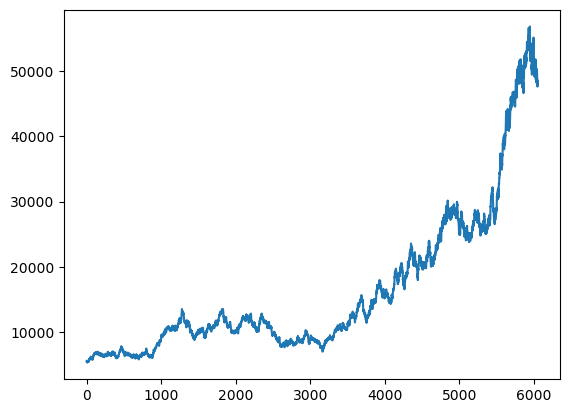

In [80]:

# Get historical daily returns and uses log to normailze returns for a lognormal distribution 

returns = np.log(1+clipped['Close'].pct_change(-1))

# creates mean and std of returns

mu, sigma = returns.mean(), returns.std() 

#create random number from normal distribution of Returns

sim_returns = np.random.normal(mu, sigma,6048)

initial = 5615.35

sim_prices = initial * (sim_returns +1).cumprod()

plt.plot(sim_prices)

In [82]:

# Calculates Average Forecasted Returns of 10,000 Different Price Paths and VaR/CVaR

for i in range(num_simulations):
    # Simulate daily returns
    sim_returns = np.random.normal(mu, sigma, num_days)
    # Compute the price path using cumulative product
    sim_prices = initial_price * (1 + sim_returns).cumprod()
    # Store the final price of this simulation
    final_prices[i] = sim_prices[-1]

# Calculate percentage changes from the initial price
percent_changes = ((final_prices - initial_price) / initial_price) * 100

# Calculate the average return
average_return = np.mean(percent_changes)

print(f"Average return over {num_simulations} simulations: {average_return:.2f}%")

# Calculate VaR and CVaR
confidence_level = 0.95
percentile = (1 - confidence_level) * 100

# VaR at the desired percentile
var = np.percentile(percent_changes, percentile)

# CVaR is the average of the percentage changes that are less than or equal to VaR
cvar = np.mean([change for change in percent_changes if change <= var])

print(f"Average return over {num_simulations} simulations: {average_return:.2f}%")
print(f"Value at Risk (VaR) at {confidence_level*100:.0f}% confidence level: {var:.2f}%")
print(f"Conditional Value at Risk (CVaR) at {confidence_level*100:.0f}% confidence level: {cvar:.2f}%")

Average return over 10000 simulations: 274.11%
Average return over 10000 simulations: 274.11%
Value at Risk (VaR) at 95% confidence level: -52.04%
Conditional Value at Risk (CVaR) at 95% confidence level: -66.53%


Text(0.5, 1.0, 'Forecasted S&P 500 ETF Price Paths for 24 Years(Approx. Historical Data Time Period) ')

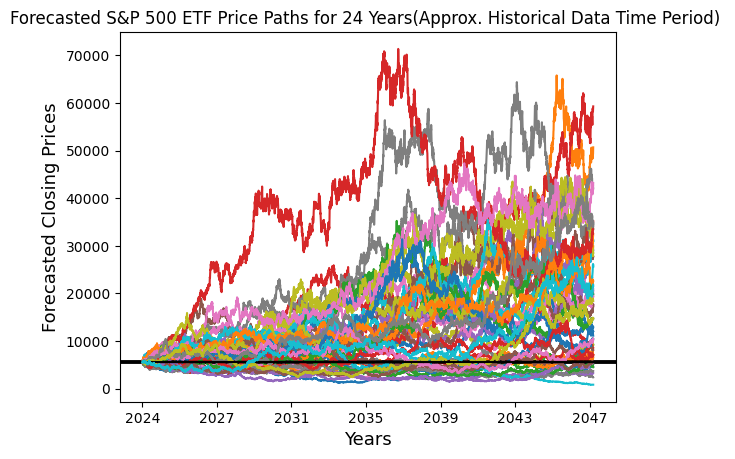

In [83]:

# Simulates 50 Possible Price Paths of S&P 500 ETF over the next 24 years 


for i in range(50):
    sim_returns = np.random.normal(mu, sigma,num_days)
    sim_prices = initial * (sim_returns +1).cumprod()
    plt.axhline(initial, c='k')
    plt.plot(sim_prices)

plt.xlabel('Years', fontsize = 13)

plt.ylabel('Forecasted Closing Prices', fontsize = 13 )

#creates time span based off historical Return time span 

num_days = 252*24

# creates date range based off of my Historical Returns Date 
date_range = pd.date_range(start=clipped.index.max() + pd.Timedelta(days=1), periods=num_days, freq='B')

#uses lambda to create a function that formats x axis in years 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x // 252) + (2023 if date_range[0].year == 2023 else date_range[0].year)}"))
percent_changes = []

final_price = sim_prices[-1]
percent_change = ((final_price - initial) / initial) * 100
percent_changes.append(percent_change)





           
plt.title('Forecasted S&P 500 ETF Price Paths for 24 Years(Approx. Historical Data Time Period) ')

In [117]:
# calculation for Value at Risk 

confidence_interval = 0.95

Var = np.percentile(sim_returns,100*(1- confidence_interval)) 

#shows Value at risk for the confidence interval inputed 

print(-Var + initial)


5615.370072809511


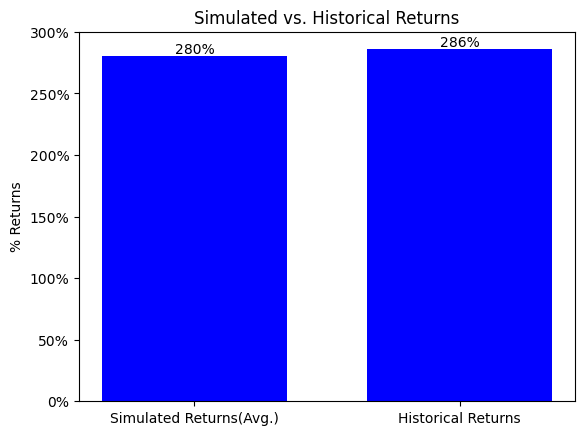

In [145]:

# Creates two bar Charts comparing Simulated Average Return to Historical Returns 


import matplotlib.pyplot as plt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,FormatStrFormatter)
import matplotlib.ticker as mtick
from pylab import rcParams



A = [280.23, 285.88]

fig, ax = plt.subplots()

X=['Simulated Returns(Avg.)', 'Historical Returns']

hbars = ax.bar(X, A, color = "b", width =.7)

ax.bar_label(hbars,fmt='%.0f%%')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.ylabel('% Returns')

plt.title('Simulated vs. Historical Returns')

#
plt.show()

# Metrics are then gathered and presented in a Powerpoint to draw conclusions on a 24-Year Investment in the S&P 500 ETF

# Powerpoint is linked below 

# https://1drv.ms/p/c/949704e030fc7cdb/Edt8_DDgBJcggJSQRwAAAAABHEpML5Mx81n-GOGt2UmCCg